# Tutorial de Proyecto de Regresión Lineal
Comprender un dataset nuevo.
Procesarlo aplicando un análisis exploratorio (EDA).
Modelar los datos utilizando la regresión lineal.
Analizar los resultados y optimizar el modelo si fuera posible.
🌱 Cómo iniciar este proyecto
Sigue las siguientes instrucciones:

Crea un nuevo repositorio basado en el proyecto de Machine Learning haciendo clic aquí.
Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.
🚛 Cómo entregar este proyecto
Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

## 📝 Instrucciones
Predecir el coste del seguro médico de una persona
La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de los datos fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

- **Paso 1:** Carga del conjunto de datos
El conjunto de datos se puede encontrar en esta carpeta de proyecto bajo el nombre medical_insurance_cost.csv. Puedes cargarlo en el código directamente desde el siguente enlace:

https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv
O descargarlo y añadirlo a mano en tu repositorio. En este conjunto de datos encontrarás las siguientes variables:

age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. índice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. Prima del seguro médico (numérico)

- **Paso 2:** Realiza un EDA completo
Este segundo paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores.

- **Paso 3:** Construye un modelo de regresión lineal
No es necesario que optimices los hiperparámetros. Comienza utilizando una definición por defecto y mejórala en el paso siguiente.

- **Paso 4:** Optimiza el modelo anterior
Después de entrenar el modelo, si los resultados no son satisfactorios, optimízalo si fuera posible.

**Nota: También incorporamos muestras de solución en ./solution.ipynb que te sugerimos honestamente que solo uses si estás atascado por más de 30 minutos o si ya has terminado y quieres compararlo con tu enfoque.**

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# EDA

## PASO 1 : Planteamos nuestro problema o nuestro target a investigar


### ¿ Cual va ser el precio de la prima, segun el tipo de cliente?

## PASO 2: Recopilacion de datos

In [2]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/medical-insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Paso 3: Análisis Descriptivo

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Paso 4: Limpieza de Datos

### Buscamos duplicados:

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


### Eliminamos duplicados

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

## Paso 5: Análisis de Variables

### Análisis de Variables Univariante

#### Análisis de Variables Univariante Categóricas

En este caso, las variables categóricas son: `region`, `sex` y `smoker`:

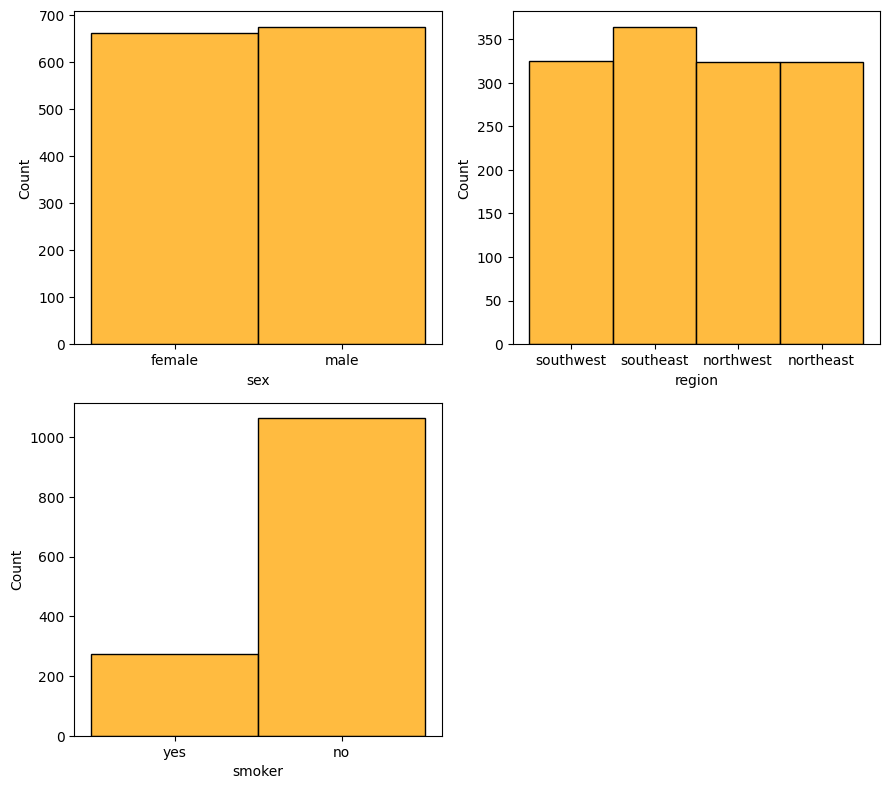

In [12]:
fig, axis = plt.subplots(2, 2, figsize=(9, 8))

sns.histplot(ax=axis[0, 0], data=df, x="sex", color='orange')
sns.histplot(ax=axis[0, 1], data=df, x="region", color='orange')
sns.histplot(ax=axis[1, 0], data=df, x="smoker", color='orange')
fig.delaxes(axis[1,1])
plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico
- sex y region están balanceadas, lo que es positivo para el análisis.
- smoker está desbalanceada, pero es una variable muy influyente en el costo de la prima, así que no se debe eliminar.

### Análisis de Variables Univariante Numéricas

Debemos también identificar cuáles son las numéricas, que son `children`, `charges`,  `bmi` y `age`.

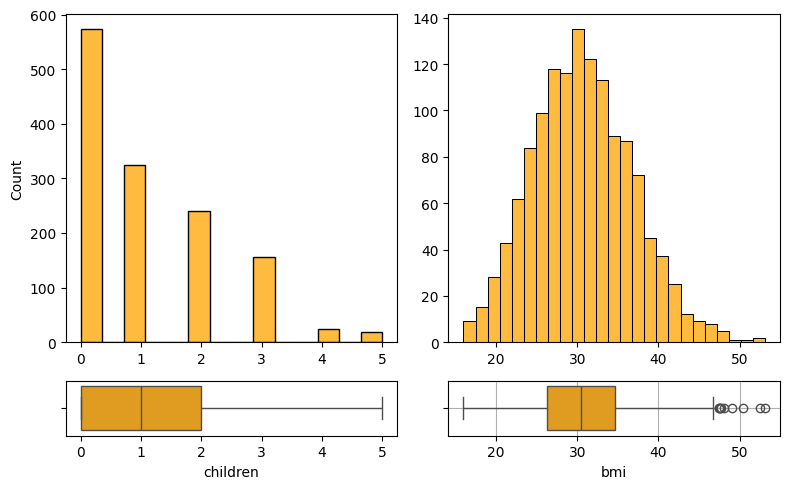

In [13]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax=axis[0, 0], data=df, x="children", color='orange').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="children", color='orange')
sns.histplot(ax=axis[0, 1], data=df, x="bmi", color='orange').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="bmi", color='orange')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico

- `children` sesgada hacia 0, con pocos valores altos.
- `bmi` distribución casi normal, con algunos outliers relevantes.


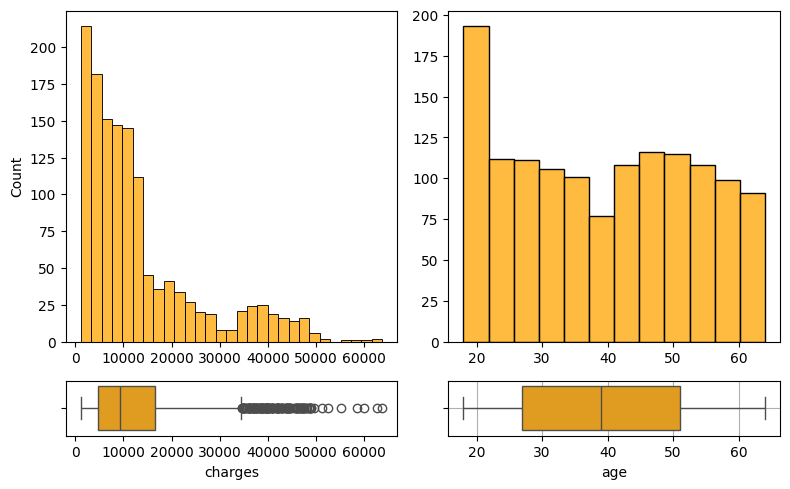

In [14]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax=axis[0, 0], data=df, x="charges", color='orange').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="charges", color='orange')
sns.histplot(ax=axis[0, 1], data=df, x="age", color='orange').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="age", color='orange')
plt.grid()
plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico
- `charges` distribución sesgada con outliers, requiere tratamiento especial.
- `age` distribución más uniforme, sin problemas de outliers.

### Análisis de Variables Multivariante

#### Análisis numérico-numérico

#### charges - (bmi, age, children)


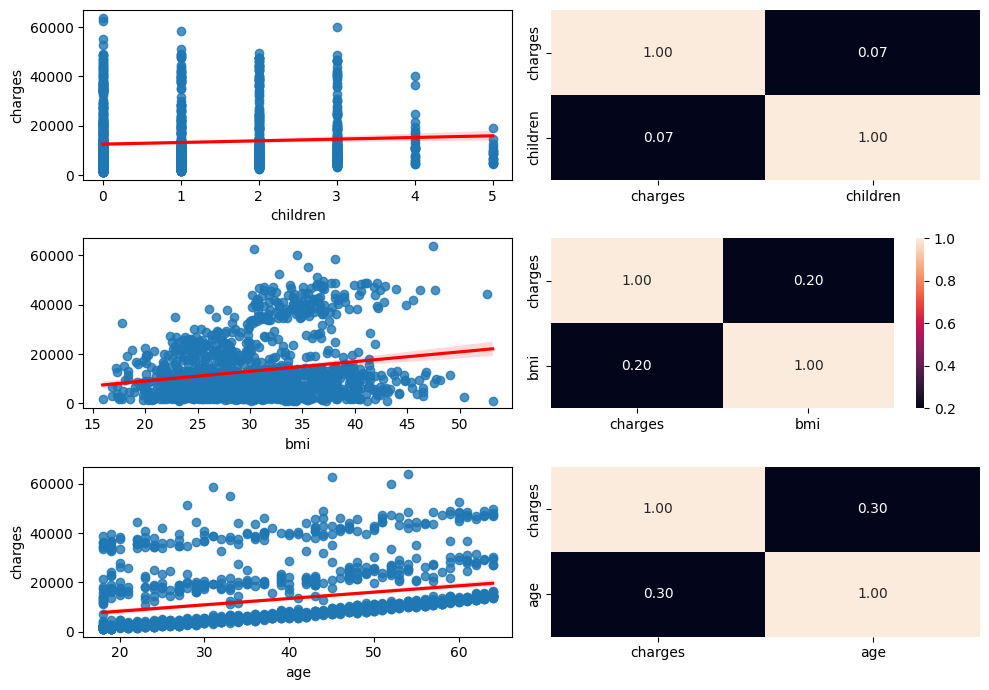

In [15]:
# Generamos las correlaciones
corr_charges_children = df[["charges", "children"]].corr()
corr_charges_bmi = df[["charges", "bmi"]].corr()
corr_charges_age = df[["charges", "age"]].corr()
# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(3, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x="children", y="charges", line_kws={'color': 'red'})
sns.heatmap(ax=axis[0, 1], data=corr_charges_children, annot=True, fmt=".2f", cbar=False)


sns.regplot(ax=axis[1, 0], data=df, x="bmi", y="charges", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_charges_bmi, annot=True, fmt=".2f")

sns.regplot(ax=axis[2, 0], data=df, x="age", y="charges", line_kws={'color': 'red'})
sns.heatmap(ax=axis[2, 1], data=corr_charges_age, annot=True, fmt=".2f", cbar=False)
plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico
- Más influyentes: `age` y `bmi` muestran correlaciones claras con el costo.
- Menos influyente: `children` apenas aporta información


### Análisis categórico-categórico

#### charges - (sex, smoker, region)

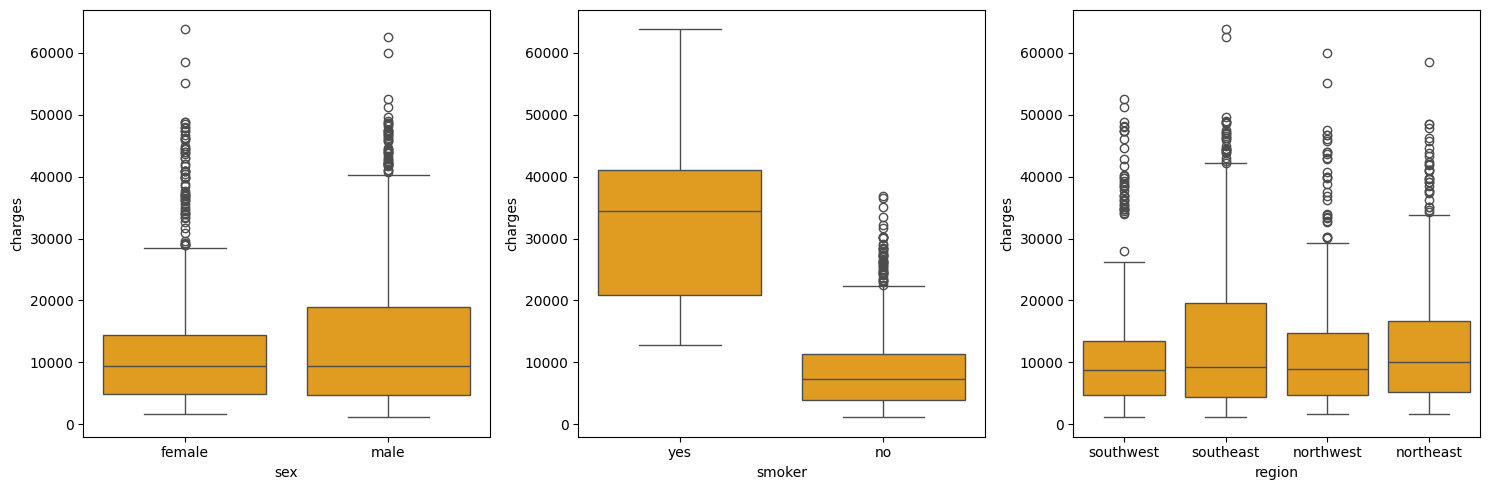

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0], color='orange')
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[1], color='orange')
sns.boxplot(x='region', y='charges', data=df, ax=axes[2], color='orange')
plt.tight_layout()
plt.show()


##### Conclusión sobre el grafico

- Muy influyente: `smoker` diferencia clara y fuerte en los cargos.
- Moderadamente influyente: `region` variaciones entre zonas.
- Poco influyente: `sex` apenas diferencia


#### Combinaciones del target con varias predictoras

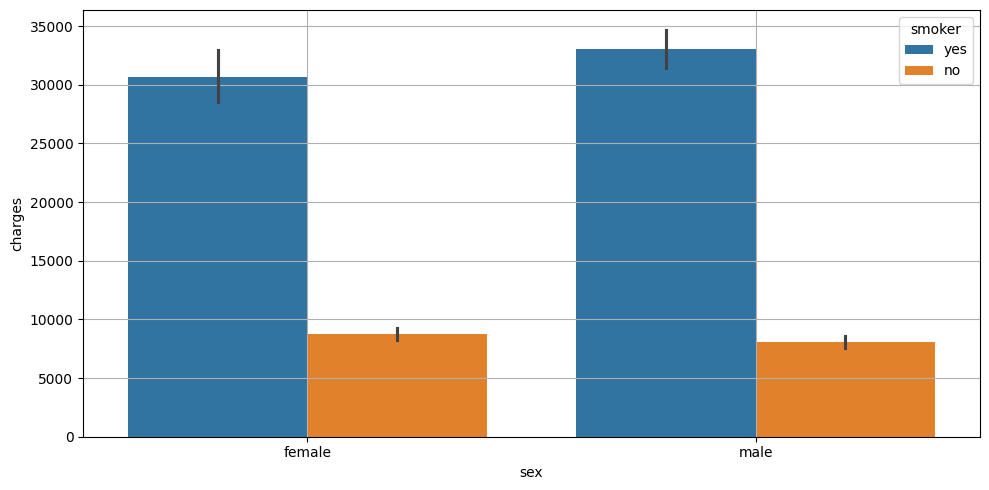

In [17]:
fig = plt.subplots(figsize=(10, 5))

sns.barplot( data=df, x="sex", y="charges", hue="smoker")
plt.grid()
plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico

- Factor dominante: `smoker`  eleva drásticamente los cargos en ambos sexos.
- Factor débil: `sex`  apenas aporta información adicional.

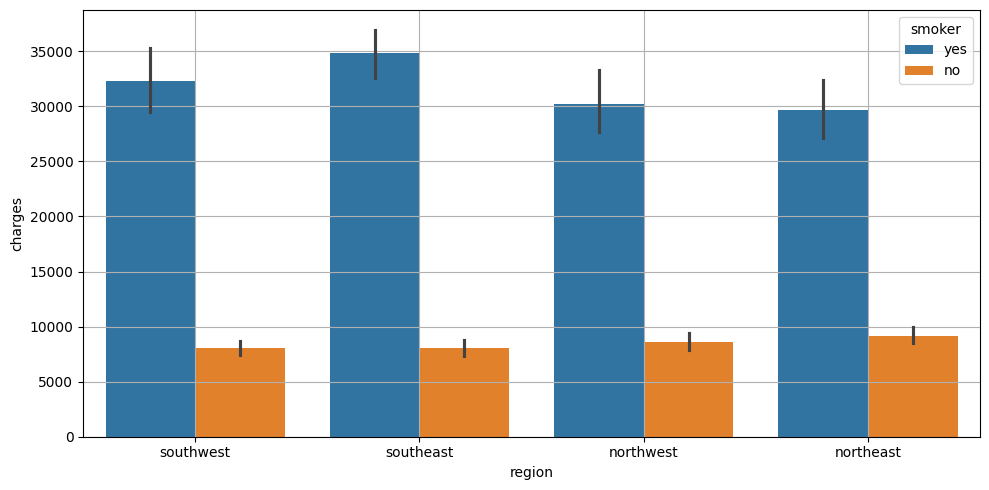

In [18]:
fig = plt.subplots(figsize=(10, 5))

sns.barplot( data=df, x="region", y="charges", hue="smoker")
plt.grid()
plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico

- Factor dominante: `smoker` eleva drásticamente los cargos en todas las regiones y sexos.
- Factor moderado: `region` introduce variaciones, especialmente entre southeast y southwest.
- Factor débil: `sex` apenas aporta información adicional.


#### Análisis de correlaciones

In [19]:
df['sex'] = pd.factorize(df['sex'])[0]
df['region'] = pd.factorize(df['region'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


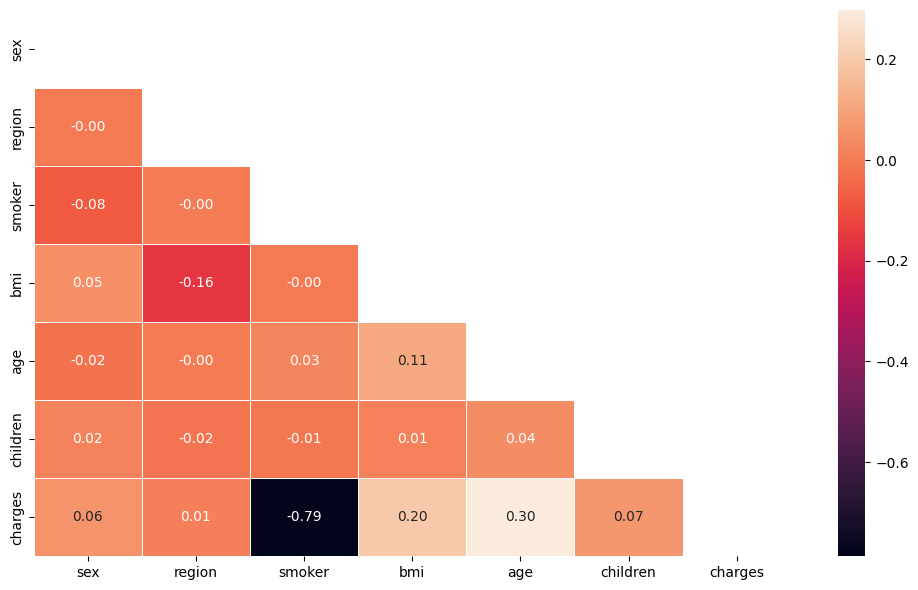

In [20]:
corr = df[["sex", "region", "smoker", "bmi", "age", "children", "charges"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico

Con este grafico nos damos cuenta que las variables que estan correlacionadas y que influiran en el precio de la prima son:
1. `smoker`
2. `age`
3. `bmi`

Tambien podriamos decir que tienen un ligero impacto las variables de `region` y `children`. 

Y por ultimo confirmamos que la variable `sex` no tiene ningun tipo de influencia en el precio, por lo cual podemos presindir de ella.

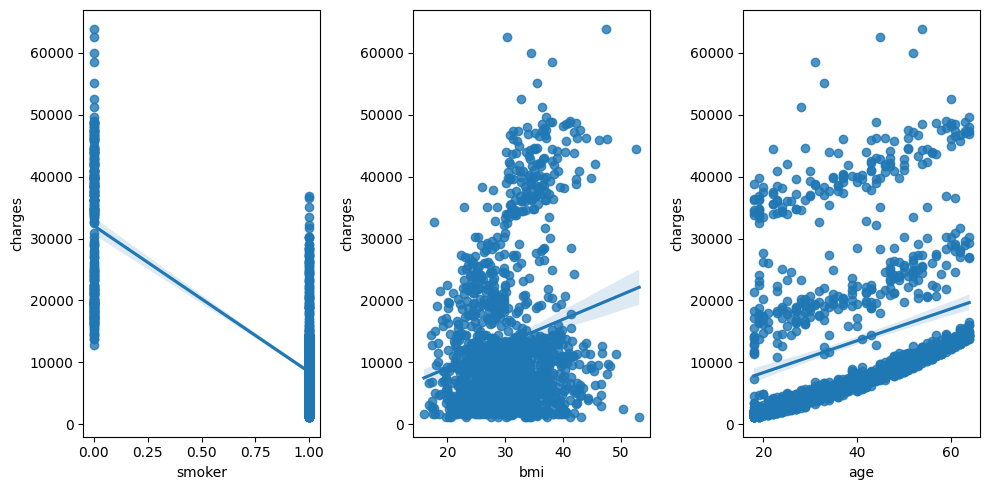

In [21]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=3)

sns.regplot(ax=axis[0], data=df, x="smoker", y="charges")
sns.regplot(ax=axis[1], data=df, x="bmi", y="charges")
sns.regplot(ax=axis[2], data=df, x="age", y="charges")
plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico

Con este grafico podemos confirmar nuestras teorias.

- Factor dominante: `smoker_n` eleva los cargos de forma contundente.
- Factores moderados: `age` y `bmi` ambos muestran correlaciones positivas y aportan información valiosa.


## Paso 6: Ingeniería de características


#### Análisis de outliers

**Outliers: Análisis descriptivo**

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
sex,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,0.795064,0.403806,0.0000,1.000,1.0000,1.00000,1.00000
region,1337.0,1.483919,1.105208,0.0000,1.000,1.0000,2.00000,3.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


**Outliers: Visualización**

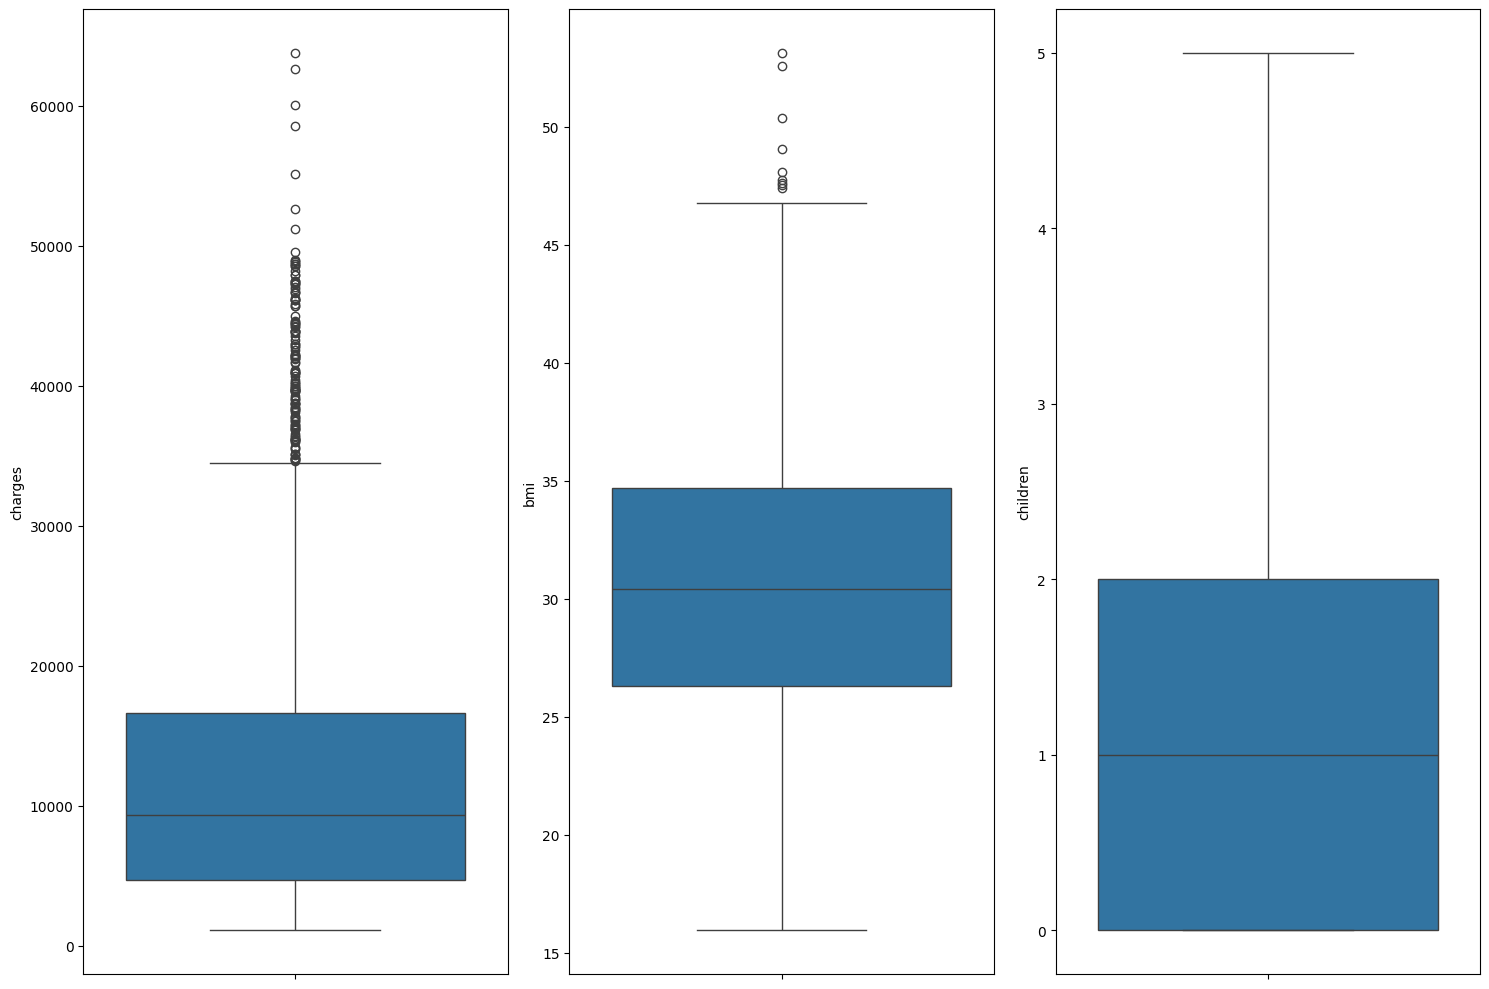

In [23]:
fig, axis = plt.subplots(figsize=(15, 10), ncols=3)

sns.boxplot(ax=axis[0], data=df, y="charges")
sns.boxplot(ax=axis[1], data=df, y="bmi")
sns.boxplot(ax=axis[2], data=df, y="children")


plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico

- Muy dispersa y sesgada: `charges` requiere tratamiento especial.
- Estable y relevante: `bmi` predictor clave.
- Discreta y poco influyente: `children` aporta información limitada.

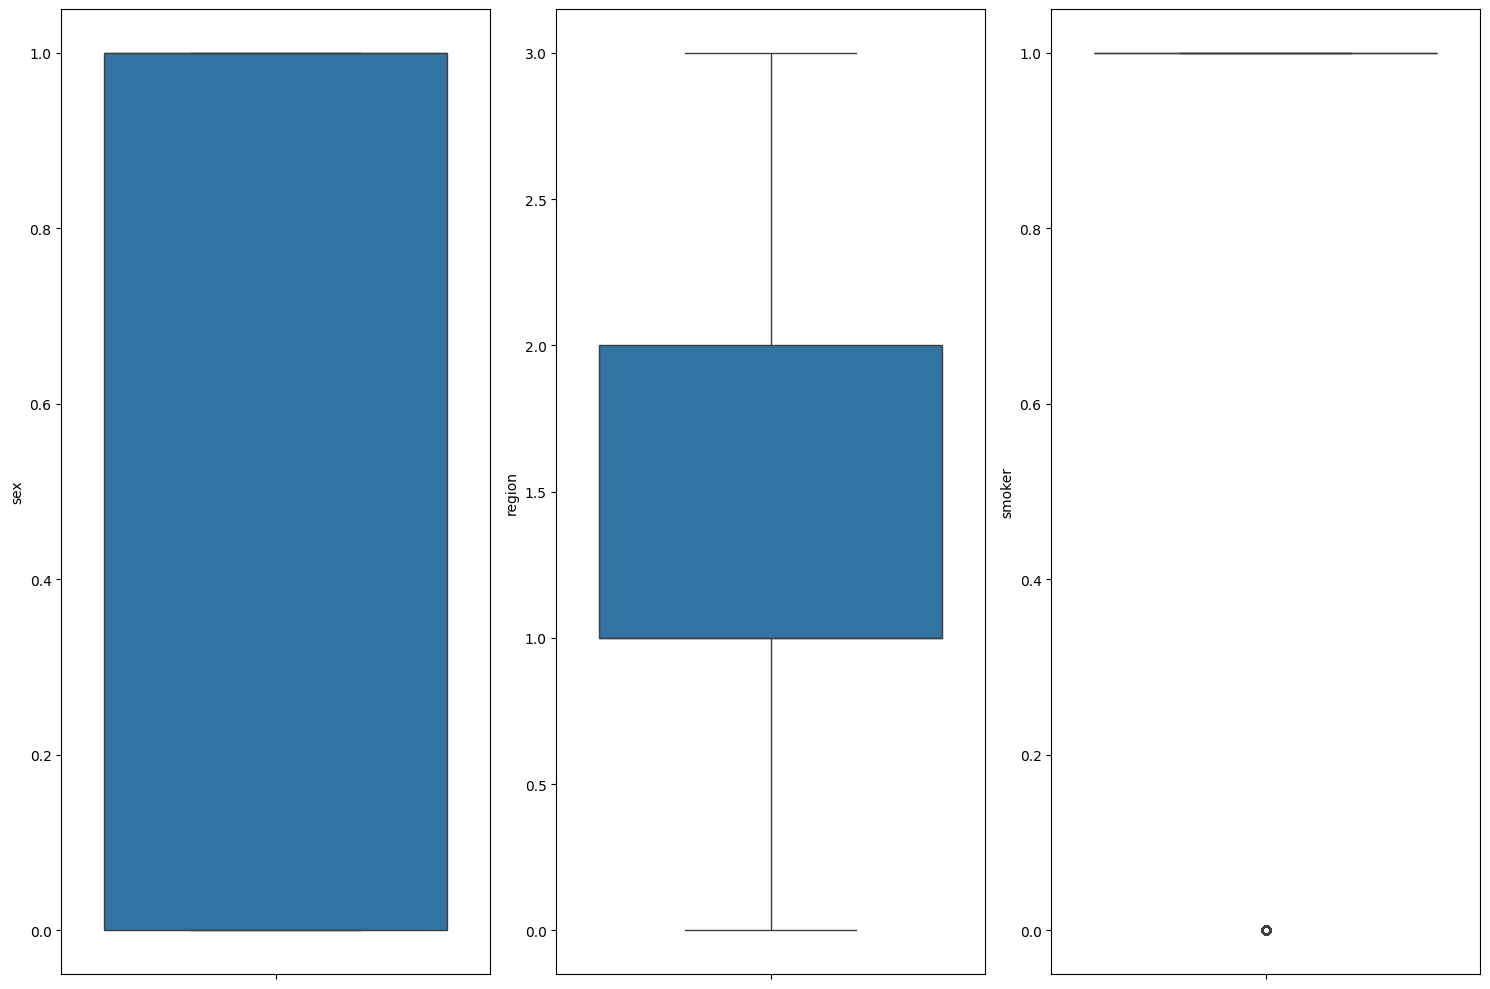

In [24]:
fig, axis = plt.subplots(figsize=(15, 10), ncols=3)

sns.boxplot(ax=axis[0], data=df, y="sex")
sns.boxplot(ax=axis[1], data=df, y="region")
sns.boxplot(ax=axis[2], data=df, y="smoker")

plt.tight_layout()
plt.show()

##### Conclusión sobre el grafico

- sex_n : No da ninguna informacion relevante.
- region_n: bien distribuida, aunque su impacto en charges es moderado.
- smoker_n: desbalanceada pero clave para explicar los cargos médicos.


##### Procedemos a la eliminacion de la columna `sex` y `sex_n` ya que no influye para nada en nuestro objetivo

In [25]:
df.drop(columns=['sex'])

,age,bmi,children,smoker,region,charges
0,19,27.900,0,0,0,16884.92400
1,18,33.770,1,1,1,1725.55230
2,28,33.000,3,1,1,4449.46200
3,33,22.705,0,1,2,21984.47061
4,32,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,1,2,10600.54830
1334,18,31.920,0,1,3,2205.98080
1335,18,36.850,0,1,1,1629.83350
1336,21,25.800,0,1,0,2007.94500


#### Buscaremos y analizaremos nuestros valores extremos segun nuestros cuartiles

Comenzamos con el bmi:

In [26]:
bmi_stats = df["bmi"].describe()
bmi_stats

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [27]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 47.32, límite inferior: 13.67, rango intercuartílico: 8.41'

#### Buscamos los bmi por encima de nuestro limite superior, y asi proceder a analizarlos

In [28]:
df[df["bmi"] > 47]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,1,1,11381.32540
286,46,0,48.07,2,1,3,9432.92530
401,47,1,47.52,1,1,1,8083.91980
543,54,0,47.41,0,0,1,63770.42801
847,23,1,50.38,1,1,1,2438.05520
860,37,0,47.60,2,0,0,46113.51100
1047,22,1,52.58,1,0,1,44501.39820
1088,52,1,47.74,1,1,1,9748.91060
1317,18,1,53.13,0,1,1,1163.46270


In [29]:
outliers = df[(df['bmi'] > 47)]
outliers.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,3.0,51461.779070,10690.035359,44501.3982,45307.45460,46113.51100,54941.969505,63770.42801
1,6.0,7041.433167,4212.190337,1163.4627,3849.52135,8758.42255,9669.914275,11381.32540


In [30]:
outliers = df[(df['bmi'] > 47)]
outliers.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,3.0,51461.779070,10690.035359,44501.3982,45307.45460,46113.51100,54941.969505,63770.42801
1,6.0,7041.433167,4212.190337,1163.4627,3849.52135,8758.42255,9669.914275,11381.32540


##### Conclusión

- Los outliers de BMI no siempre generan cargos extremos: si la persona no fuma, los costos se mantienen relativamente bajos.
- En cambio, los fumadores con BMI >47 son responsables de los cargos más altos del dataset, con valores que superan los 60,000.
- Esto confirma que el hábito de fumar es el factor dominante, y que el BMI actúa como un amplificador del riesgo


#### Continuamos con los charges

In [31]:
charges_stats = df["charges"].describe()
charges_stats

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [32]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["charges"].quantile(0.25)
q3 = df["charges"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 34524.78, límite inferior: 0, rango intercuartílico: 11911.37'

In [33]:
outliers = df[(df['charges'] > 34524.78)]
outliers.groupby('smoker')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,136.0,35.651103,4.414486,22.895,32.72125,35.25,37.725,52.58
1,3.0,31.643333,4.258360,26.800,30.06500,33.33,34.065,34.80


In [34]:
df[['smoker', 'bmi', 'charges']].describe()

,smoker,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,0.795064,30.663452,13279.121487
std,0.403806,6.100468,12110.359656
min,0.000000,15.960000,1121.873900
25%,1.000000,26.290000,4746.344000
50%,1.000000,30.400000,9386.161300
75%,1.000000,34.700000,16657.717450
max,1.000000,53.130000,63770.428010


#### Procedemos a crear grupos de curatiles "Q" para categorizar nuestros niveles de bmi y asi analizar mas efectivamente

In [35]:
df['bmi_q'] = pd.qcut(df['bmi'], q=4, labels=['Q1 (más bajo)', 'Q2', 'Q3', 'Q4 (más alto)'])

grouped = df.groupby(['smoker', 'bmi_q'])['charges'].describe()

/tmp/ipykernel_621/2922201031.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['smoker', 'bmi_q'])['charges'].describe()


##### Mostramos los grupos creados

In [36]:
grouped

count          mean          std          min  \
smoker bmi_q                                                          
0      Q1 (más bajo)   71.0  20480.153110  4875.957300  12829.45510   
       Q2              66.0  24289.508239  7946.914002  16232.84700   
       Q3              61.0  39949.840128  5138.290708  33475.81715   
       Q4 (más alto)   76.0  43258.221836  5390.032260  34779.61500   
1      Q1 (más bajo)  264.0   7639.133241  5819.218888   1121.87390   
       Q2             272.0   8282.130486  5835.154302   1131.50660   
       Q3             270.0   8674.434395  5763.540830   1135.94070   
       Q4 (más alto)  257.0   9186.202144  6476.935646   1141.44510   

                               25%           50%           75%          max  
smoker bmi_q                                                                 
0      Q1 (más bajo)  16717.010750  19594.809650  23353.926375  38245.59327  
       Q2             18746.535275  21623.400475  28676.831187  62592.87309  
       Q3             36085.219000  39556.494500  42856.838000  60021.39897  
       Q4 (más alto)  39129.252900  42660.466300  46759.964825  63770.42801  
1      Q1 (más bajo)   3176.683850   6617.026575  10167.030450  30284.64294  
       Q2              4256.455512   7147.977325  11083.329600  35160.13457  
       Q3              4410.021675   8008.640500  11542.779250  36580.28216  
       Q4 (más alto)   4466.621400   8342.908750  12244.531000  36910.60803

factorizamos la nueva variable

In [37]:
df['bmi_q_n'] = pd.factorize(df['bmi_q'])[0]


/tmp/ipykernel_621/1346405190.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='bmi_q', y='charges', hue='smoker', data=df, ci='sd')


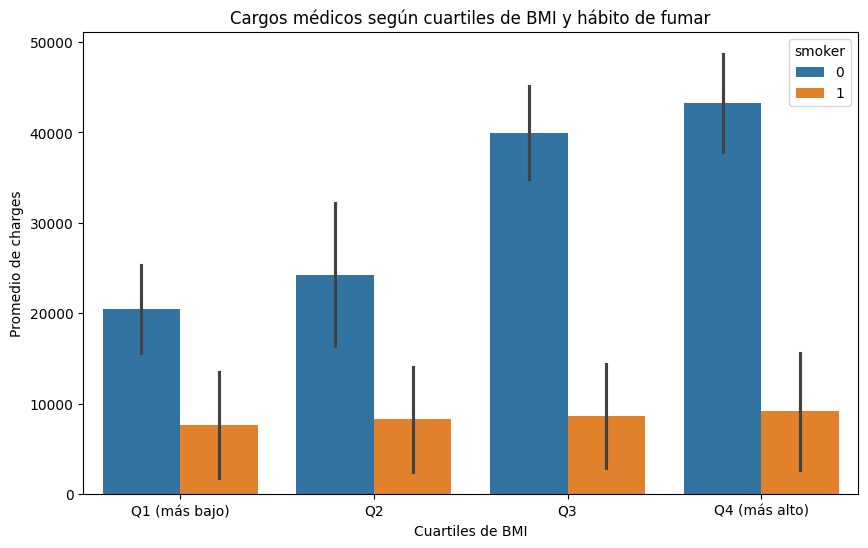

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='bmi_q', y='charges', hue='smoker', data=df, ci='sd')
plt.title('Cargos médicos según cuartiles de BMI y hábito de fumar')
plt.ylabel('Promedio de charges')
plt.xlabel('Cuartiles de BMI')
plt.show()


##### Conclusión sobre el grafico

- No fumadores: los cargos aumentan ligeramente entre Q1 y Q4, mostrando que el BMI influye pero de forma moderada.
- Fumadores: los cargos son mucho más altos en todos los cuartiles, y se disparan en Q3 y Q4 (BMI más alto).
- Conclusión: fumar es el factor dominante, pero combinado con BMI alto produce los outliers más extremos de charges.


## Paso 7: Split

### Codificar variables categóricas automáticamente


In [39]:
df_encoded = pd.get_dummies(df, drop_first=True)


### Separar X e y


In [40]:
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

### Split 80/20 estratificado por fumador


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['smoker']
)


### Entrenar y evaluar

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred = model.predict(X_test)

### Métricas


In [44]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2, rmse

(0.6948825233111396, np.float64(6355.546611934936))

### Interpretar coeficientes

In [45]:
coef = pd.Series(model.coef_, index=X.columns)
coef

age                      262.771469
sex                       19.006899
bmi                       89.638014
children                 542.885123
smoker                -24115.266159
region                   244.055648
bmi_q_n                  -13.877418
bmi_q_Q2                 390.834006
bmi_q_Q3                3203.287415
bmi_q_Q4 (más alto)     3971.078010
dtype: float64

## Conclusiones finales

El análisis exploratorio confirma que el hábito de fumar es el factor más influyente en el precio de las primas, seguido por el BMI y la edad. Las demás variables tienen impacto marginal. 

Los outliers de charges se explican casi exclusivamente por la combinación de fumador + obesidad severa.
Con estos hallazgos, el EDA puede considerarse finalizado.
